In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns



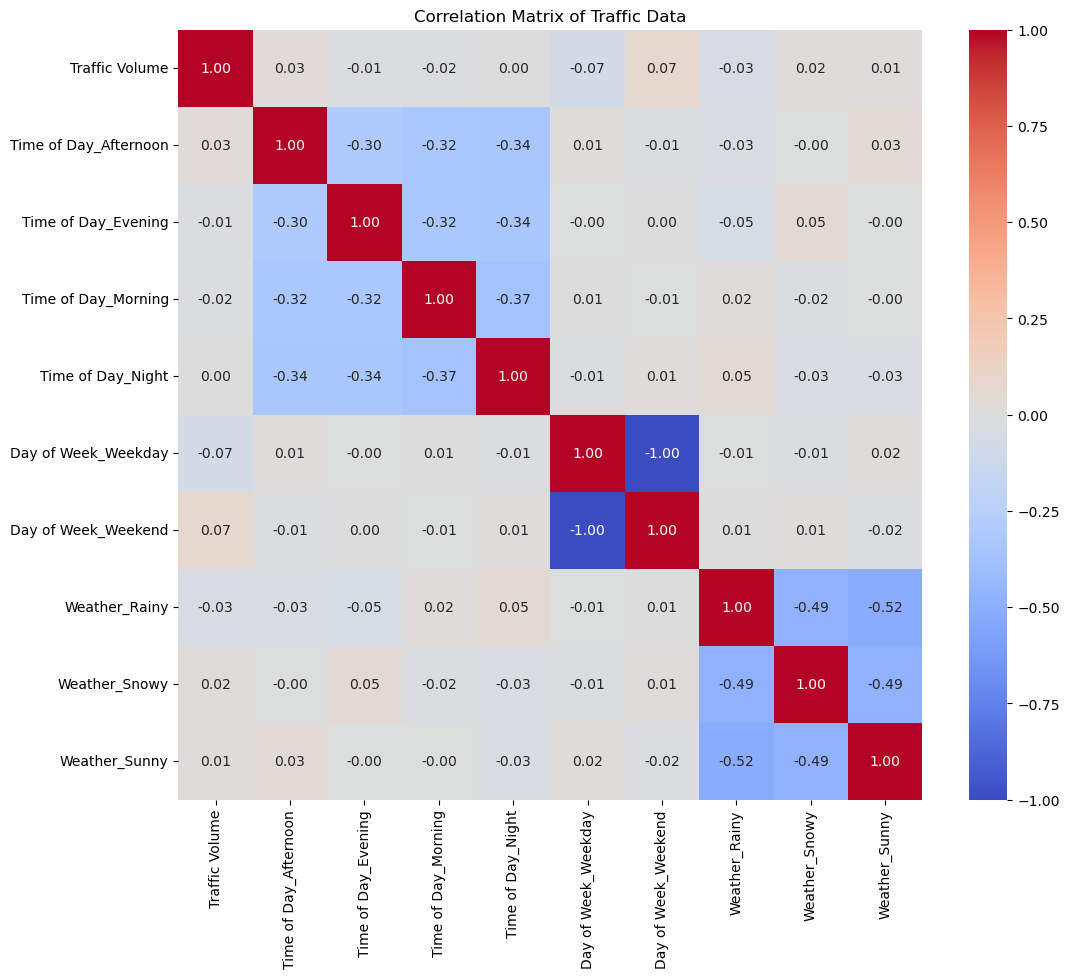

In [30]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
data = {
    'Time of Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_samples),
    'Day of Week': np.random.choice(['Weekday', 'Weekend'], n_samples),
    'Weather': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples),
    'Traffic Volume': np.random.randint(100, 1000, size=n_samples)  # Traffic volume per hour
}
df = pd.DataFrame(data)

# Convert categorical data to numeric using one-hot encoding
df_numeric = pd.get_dummies(df, columns=['Time of Day', 'Day of Week', 'Weather'])

# Calculate the correlation matrix on the numeric DataFrame
correlation_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Traffic Data')
plt.show()

# Classification

In [2]:
# generate synthetic data from bagging.py 
# https://git.txstate.edu/ML/2024Spring/blob/d667a64a345a8767acd173b05da38e407fd9add8/practice/classification/bagging.py
np.random.seed(42)
n_samples = 1000
data = {
    'Time of Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_samples),
    'Day of Week': np.random.choice(['Weekday', 'Weekend'], n_samples),
    'Weather': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples),
    'Traffic Volume': np.random.randint(100, 1000, size=n_samples)  # Traffic per hour
}
df = pd.DataFrame(data)

# Data preprocessing

In [3]:
# one-hot 
categorical_features = ['Time of Day', 'Day of Week', 'Weather']
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot', one_hot_encoder, categorical_features)
], remainder='passthrough')

In [4]:
# split data
X = df.drop('Traffic Volume', axis=1)
y = df['Traffic Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline creation

In [5]:
pipeline = Pipeline([
    ('encoder', transformer),
    ('regressor', LinearRegression())
])

In [6]:
# model training
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [8]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 66979.4771875
R^2 Score: -0.032236475668673936


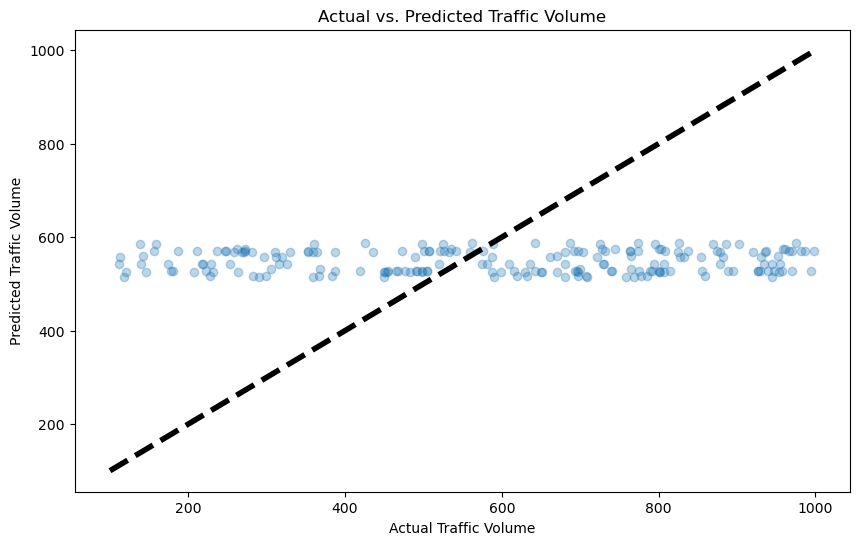

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs. Predicted Traffic Volume')
plt.show()

# Random Forest Regressor

Tring this because it is not a linear relationship.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
data = {
    'Time of Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_samples),
    'Day of Week': np.random.choice(['Weekday', 'Weekend'], n_samples),
    'Weather': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples),
    'Traffic Volume': np.random.randint(100, 1000, size=n_samples)  # Traffic volume per hour
}
df = pd.DataFrame(data)

# Data preprocessing
categorical_features = ['Time of Day', 'Day of Week', 'Weather']
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot', one_hot_encoder, categorical_features)
], remainder='passthrough')

# Split data
X = df.drop('Traffic Volume', axis=1)
y = df['Traffic Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a RandomForestRegressor
pipeline = Pipeline([
    ('encoder', transformer),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [21]:
# Grid Search to find the best parameters
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}


Mean Squared Error: 70813.98547502553
R^2 Score: -0.09133098471593715


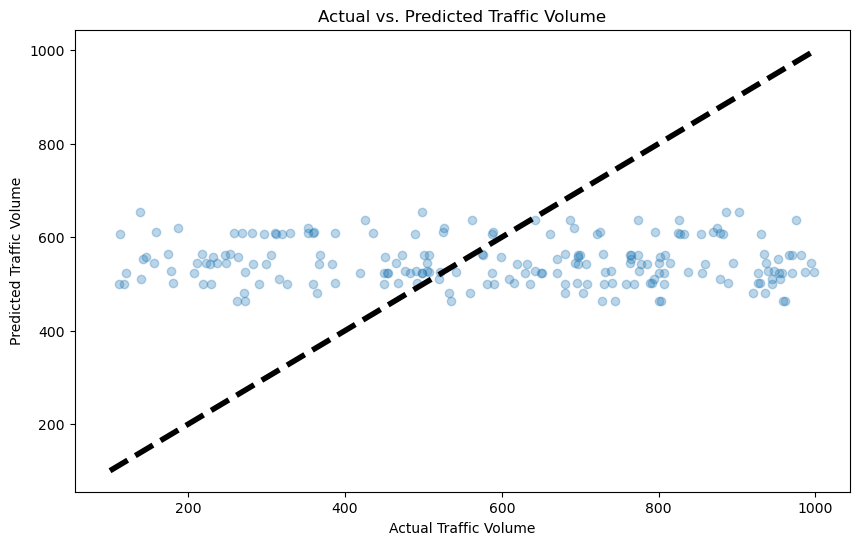

In [22]:
# Evaluate the best model found by the grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs. Predicted Traffic Volume')
plt.show()

# Trying GBM

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline with a GradientBoostingRegressor
pipeline_gbm = Pipeline([
    ('encoder', transformer),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])


In [24]:
# Fit the model
pipeline_gbm.fit(X_train, y_train)
y_pred_gbm = pipeline_gbm.predict(X_test)


In [25]:
# Calculate metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Gradient Boosting MSE: {mse_gbm}")
print(f"Gradient Boosting R^2 Score: {r2_gbm}")

Gradient Boosting MSE: 70320.01772695001
Gradient Boosting R^2 Score: -0.0837183315753327


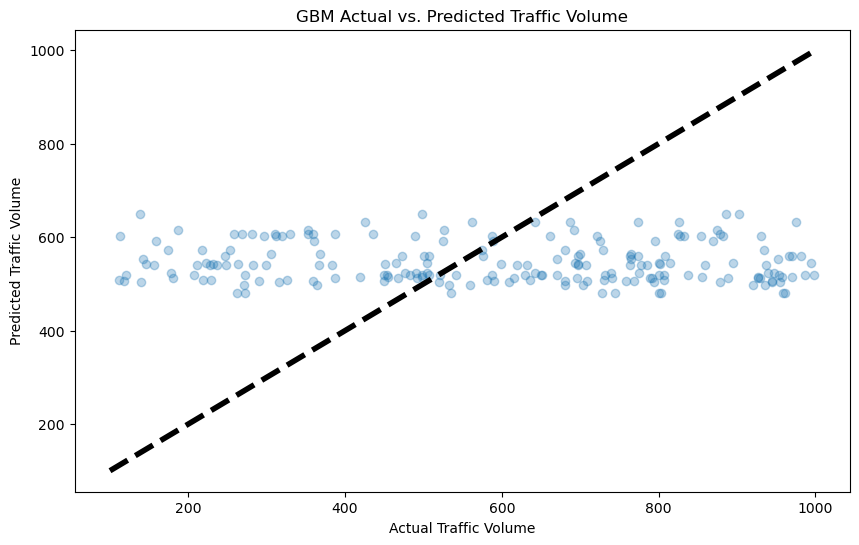

In [26]:
# Plotting results for GBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('GBM Actual vs. Predicted Traffic Volume')
plt.show()